In [1]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler as STD
import data_utils as du
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
xx = np.load('Circle_Transient_5_7_2020_0_57.npz')

In [3]:
xx.keys()

['sdf', 'vx', 'vy', 'rho', 'Re', 'Vo', 'rhoo']

In [4]:
sim,sdf,param_vec = du.load_array_with_sdf_and_params('Circle_Transient_5_7_2020_0_57.npz')

In [5]:
def showSample(input_sample):
    numFrames = input_sample.shape[0]
    fig = plt.figure()
    im = plt.imshow(input_sample[0,:,:])

    def update(i):
        img = input_sample[i,:,:]
        im.set_data(img)
        return im

    ani = animation.FuncAnimation(fig, update, frames=numFrames, repeat=False)  
    display(HTML(ani.to_html5_video()))

(221, 3, 64, 128)

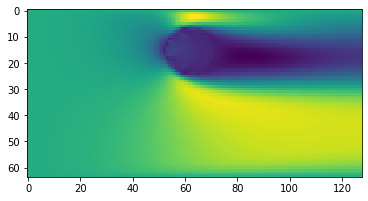

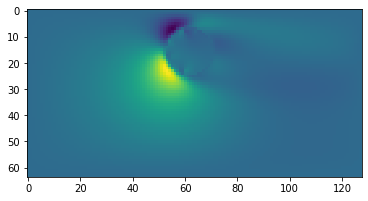

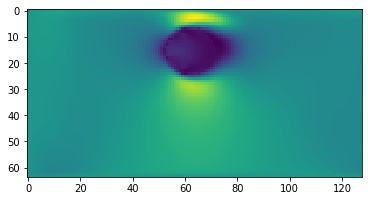

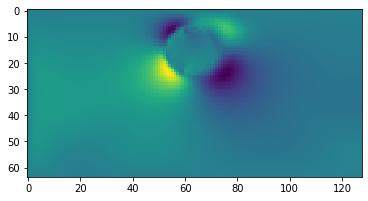

In [8]:
plt.imshow(sim[-1,0,:,:])
plt.show()
plt.imshow(sim[-1,1,:,:])
plt.show()

plt.imshow(sim[0,0,:,:])
plt.show()
plt.imshow(sim[0,1,:,:])
plt.show()

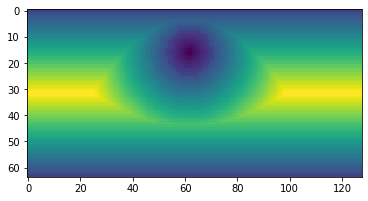

In [7]:
plt.imshow(sdf[0])

In [3]:
# normalize the data
sim_scaled,_,_ = du.normalize_sim_data(sim)
sdf_scaled,_ = du.normalize_data(sdf,SDF=True)
#param_scaled = du.normalize_data(param_vec) # will use when there are more than 1 datapoint

In [4]:
# create multiple copies of the SDF and params so that they stack with the sim data
sdf_scaled = np.repeat(sdf_scaled,sim_scaled.shape[0],axis=0)
sdf_scaled = np.expand_dims(sdf_scaled,axis = 1)

In [5]:
conv_input = np.concatenate((sim_scaled,sdf_scaled),axis = 1) # input to conv_encoder

In [16]:
param_vec = np.expand_dims(param_vec,axis = 0)
param_vec = np.repeat(param_vec,sim_scaled.shape[0],axis=0)

In [18]:
target = conv_input[:,:-1,:,:]
du.np_to_torch_dataloader(conv_input,target,Params=param_vec)

(292, 4, 64, 128)

(292, 3, 64, 128)

(292, 3)